In [1]:
"""
This is an example of using the AdaGrad optimizer in TensorFlow/Keras.
AdaGrad adapts the learning rate for each parameter based on past gradients,
which works well for sparse data and small networks.

⚠️ Limitation:
For complex or deep neural networks, AdaGrad often performs poorly because
the accumulated squared gradients grow large over time, causing the
effective learning rate to shrink drastically. This slows down training
and can lead to underfitting. Optimizers like RMSProp or Adam are generally
preferred for deeper networks.
"""

'\nThis is an example of using the AdaGrad optimizer in TensorFlow/Keras.\nAdaGrad adapts the learning rate for each parameter based on past gradients,\nwhich works well for sparse data and small networks.\n\n⚠️ Limitation:\nFor complex or deep neural networks, AdaGrad often performs poorly because\nthe accumulated squared gradients grow large over time, causing the\neffective learning rate to shrink drastically. This slows down training\nand can lead to underfitting. Optimizers like RMSProp or Adam are generally\npreferred for deeper networks.\n'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

In [3]:
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [4]:
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer=Adagrad(learning_rate=0.01, epsilon=1e-8),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
history=model.fit(X,y,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9741 - loss: 0.2342
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.2160
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9861 - loss: 0.2178
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.2256
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9694 - loss: 0.2286
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9770 - loss: 0.2294
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9817 - loss: 0.2126
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.2135
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9877 - loss: 0.2085
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9745 - loss: 0.2149
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.2112
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━

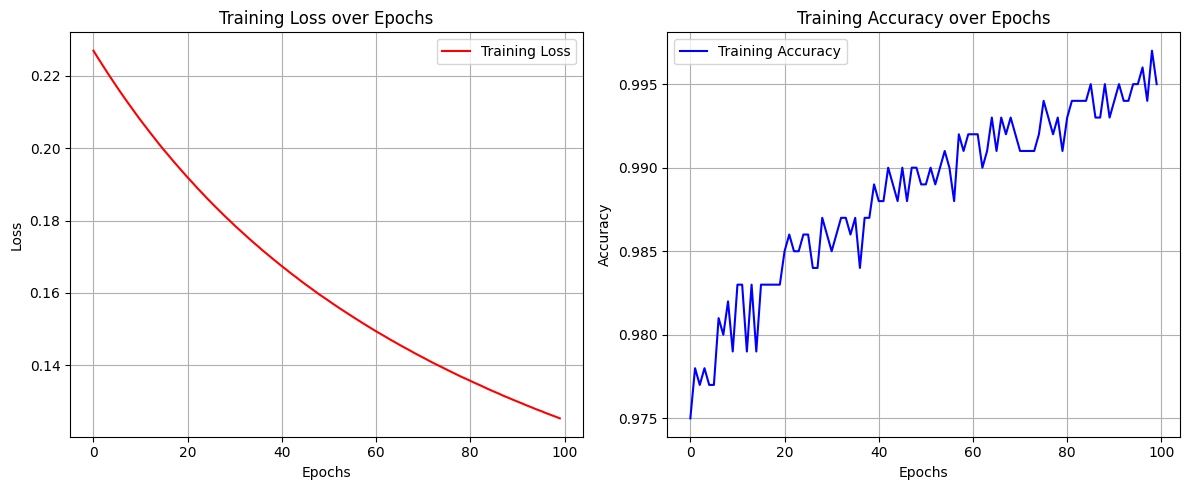

In [11]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()